# ISIC2024 Baseline ML Model with only meta data


With only partial data.

Containes EDA

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
# define data path
data_path = 'ISIC2024_data/'

In [3]:
path_train_meta = data_path + 'train-metadata.csv'
path_test_meta = data_path + 'test-metadata.csv'

In [4]:
# load the csv as pandas dataframe
df_train_meta = pd.read_csv(path_train_meta)
df_test_meta = pd.read_csv(path_test_meta)

C:\Users\26236\AppData\Local\Temp\ipykernel_15004\1027463437.py:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_meta = pd.read_csv(path_train_meta)


## Train data EDA

In [12]:
# print the column names in the dataframe
print(df_train_meta.columns)

# print the column names in the test dataframe
print(df_test_meta.columns)

# print shared column names
print(set(df_train_meta.columns).intersection(set(df_test_meta.columns)))
print(len(set(df_train_meta.columns).intersection(set(df_test_meta.columns))))

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [17]:
# print the column names that is unique to train dataframe
print(set(df_train_meta.columns).difference(set(df_test_meta.columns)))

{'lesion_id', 'iddx_full', 'iddx_3', 'iddx_4', 'iddx_5', 'tbp_lv_dnn_lesion_confidence', 'target', 'iddx_2', 'iddx_1', 'mel_mitotic_index', 'mel_thick_mm'}


In [9]:
df_train_meta[['target']].value_counts()

target
0         400666
1            393
Name: count, dtype: int64

`lesion_id`: Unique lesion identifier. Present in lesions that were manually tagged as a lesion of interest.

For baseline, we can use the lines with valid lesion id to train the model.

In [16]:
df_train_meta[['lesion_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lesion_id  22058 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


## Partial Data extraction

We use the data with valid lesion_id for training the model.

In [18]:
# extract the data with valid lesion_id
df_train_valid_lesion = df_train_meta[df_train_meta['lesion_id'].notna()]
df_train_valid_lesion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22058 entries, 1 to 401056
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   isic_id                       22058 non-null  object 
 1   target                        22058 non-null  int64  
 2   patient_id                    22058 non-null  object 
 3   age_approx                    21894 non-null  float64
 4   sex                           21467 non-null  object 
 5   anatom_site_general           21917 non-null  object 
 6   clin_size_long_diam_mm        22058 non-null  float64
 7   image_type                    22058 non-null  object 
 8   tbp_tile_type                 22058 non-null  object 
 9   tbp_lv_A                      22058 non-null  float64
 10  tbp_lv_Aext                   22058 non-null  float64
 11  tbp_lv_B                      22058 non-null  float64
 12  tbp_lv_Bext                   22058 non-null  float64
 13  tbp_l

Value drops:
- `image_type` is dropped as it has only one unique value
- `patient_id` is dropped as it is not useful
- `tbp_tile_type` is dropped as the color we are using is not helpful in meta data only analyis
- `attribution` is dropped as it is of no use the data source
- `copyright_license` is dropped as it is of no use the license
- `iddx_2`, `iddx_3`, `iddx_4` and `iddx_5` as majority of the values are missing
- `mel_mitotic_index` is dropped as it has majority of the values missing
- `mel_thick_mm` is dropped as it has majority of the values missing
- `tbp_lv_location` as in `tbp_lv_location_simple` we have the simplified version of the location

In [19]:
# see unique value in image type
df_train_valid_lesion[['image_type']].value_counts()

image_type        
TBP tile: close-up    22058
Name: count, dtype: int64

In [20]:
# see unique value in attribution
df_train_valid_lesion[['attribution']].value_counts()

attribution                                                                                                                                        
Frazer Institute, The University of Queensland, Dermatology Research Centre                                                                            9056
Memorial Sloan Kettering Cancer Center                                                                                                                 6212
University Hospital of Basel                                                                                                                           3004
ACEMID MIA                                                                                                                                             1792
Department of Dermatology, Hospital Clínic de Barcelona                                                                                                1720
Department of Dermatology, University of Athens, Andreas Syggros Hospita

In [22]:
# see unique value in copyright licence
df_train_valid_lesion[['copyright_license']].value_counts()

copyright_license
CC-BY                15435
CC-BY-NC              4831
CC-0                  1792
Name: count, dtype: int64

In [25]:
# have a look at tbp_lv_location and tbp_lv_location_simple
df_train_valid_lesion[['tbp_lv_location']].value_counts()

tbp_lv_location        
Torso Back Top Third       3859
Torso Back Middle Third    3446
Torso Front Top Half       2916
Torso Front Bottom Half    1791
Left Leg - Upper           1482
Right Leg - Upper          1355
Left Leg - Lower           1353
Right Leg - Lower          1286
Left Arm - Upper           1166
Right Arm - Upper          1098
Head & Neck                 863
Left Arm - Lower            442
Torso Back Bottom Third     352
Right Arm - Lower           329
Unknown                     141
Left Leg                     84
Left Arm                     62
Right Leg                    27
Right Arm                     6
Name: count, dtype: int64

In [26]:
df_train_valid_lesion[['tbp_lv_location_simple']].value_counts()

tbp_lv_location_simple
Torso Back                7657
Torso Front               4707
Left Leg                  2919
Right Leg                 2668
Left Arm                  1670
Right Arm                 1433
Head & Neck                863
Unknown                    141
Name: count, dtype: int64

In [27]:
# drop the columns
df_train_valid_lesion = df_train_valid_lesion.drop(columns=['image_type', 'patient_id', 'tbp_tile_type', 'attribution', 'copyright_license', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index', 'mel_thick_mm', 'tbp_lv_location'])

In [28]:
df_train_valid_lesion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22058 entries, 1 to 401056
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   isic_id                       22058 non-null  object 
 1   target                        22058 non-null  int64  
 2   age_approx                    21894 non-null  float64
 3   sex                           21467 non-null  object 
 4   anatom_site_general           21917 non-null  object 
 5   clin_size_long_diam_mm        22058 non-null  float64
 6   tbp_lv_A                      22058 non-null  float64
 7   tbp_lv_Aext                   22058 non-null  float64
 8   tbp_lv_B                      22058 non-null  float64
 9   tbp_lv_Bext                   22058 non-null  float64
 10  tbp_lv_C                      22058 non-null  float64
 11  tbp_lv_Cext                   22058 non-null  float64
 12  tbp_lv_H                      22058 non-null  float64
 13  tbp_l

array([[<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'age_approx'}>,
        <Axes: title={'center': 'clin_size_long_diam_mm'}>,
        <Axes: title={'center': 'tbp_lv_A'}>,
        <Axes: title={'center': 'tbp_lv_Aext'}>,
        <Axes: title={'center': 'tbp_lv_B'}>],
       [<Axes: title={'center': 'tbp_lv_Bext'}>,
        <Axes: title={'center': 'tbp_lv_C'}>,
        <Axes: title={'center': 'tbp_lv_Cext'}>,
        <Axes: title={'center': 'tbp_lv_H'}>,
        <Axes: title={'center': 'tbp_lv_Hext'}>,
        <Axes: title={'center': 'tbp_lv_L'}>],
       [<Axes: title={'center': 'tbp_lv_Lext'}>,
        <Axes: title={'center': 'tbp_lv_areaMM2'}>,
        <Axes: title={'center': 'tbp_lv_area_perim_ratio'}>,
        <Axes: title={'center': 'tbp_lv_color_std_mean'}>,
        <Axes: title={'center': 'tbp_lv_deltaA'}>,
        <Axes: title={'center': 'tbp_lv_deltaB'}>],
       [<Axes: title={'center': 'tbp_lv_deltaL'}>,
        <Axes: title={'center': 'tbp_lv_delta

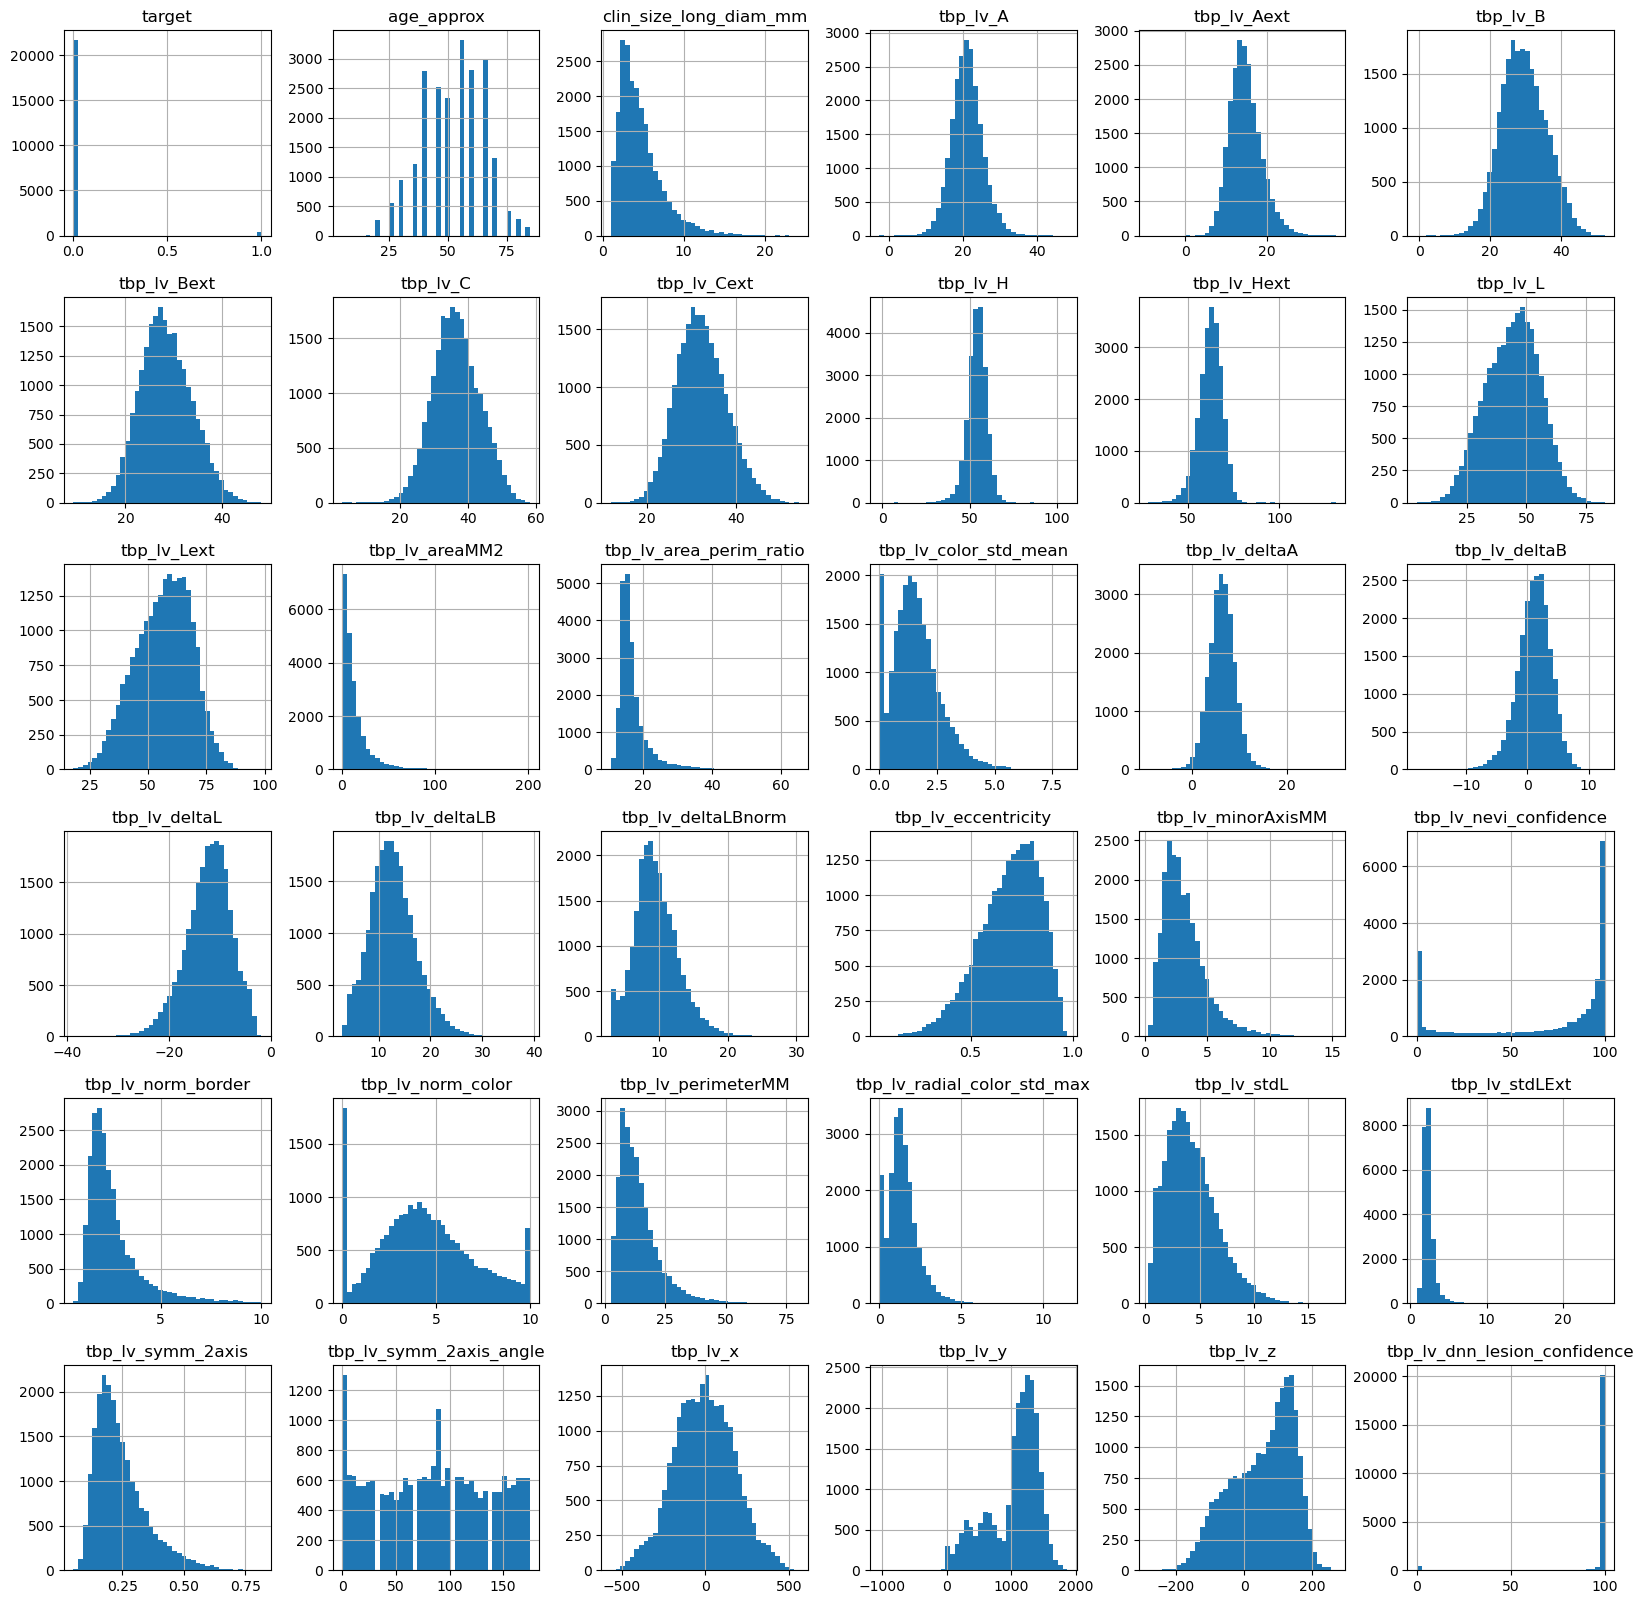

In [31]:
df_train_valid_lesion.hist(figsize=(20, 20), bins=40)

In [32]:
# separate the df target 0 and 1
df_train_valid_lesion_0 = df_train_valid_lesion[df_train_valid_lesion['target'] == 0]
df_train_valid_lesion_1 = df_train_valid_lesion[df_train_valid_lesion['target'] == 1]

C:\Users\26236\AppData\Local\Temp\ipykernel_15004\3409806899.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_train_valid_lesion_0.hist(ax=ax, bins=40, alpha=0.5, color='blue')


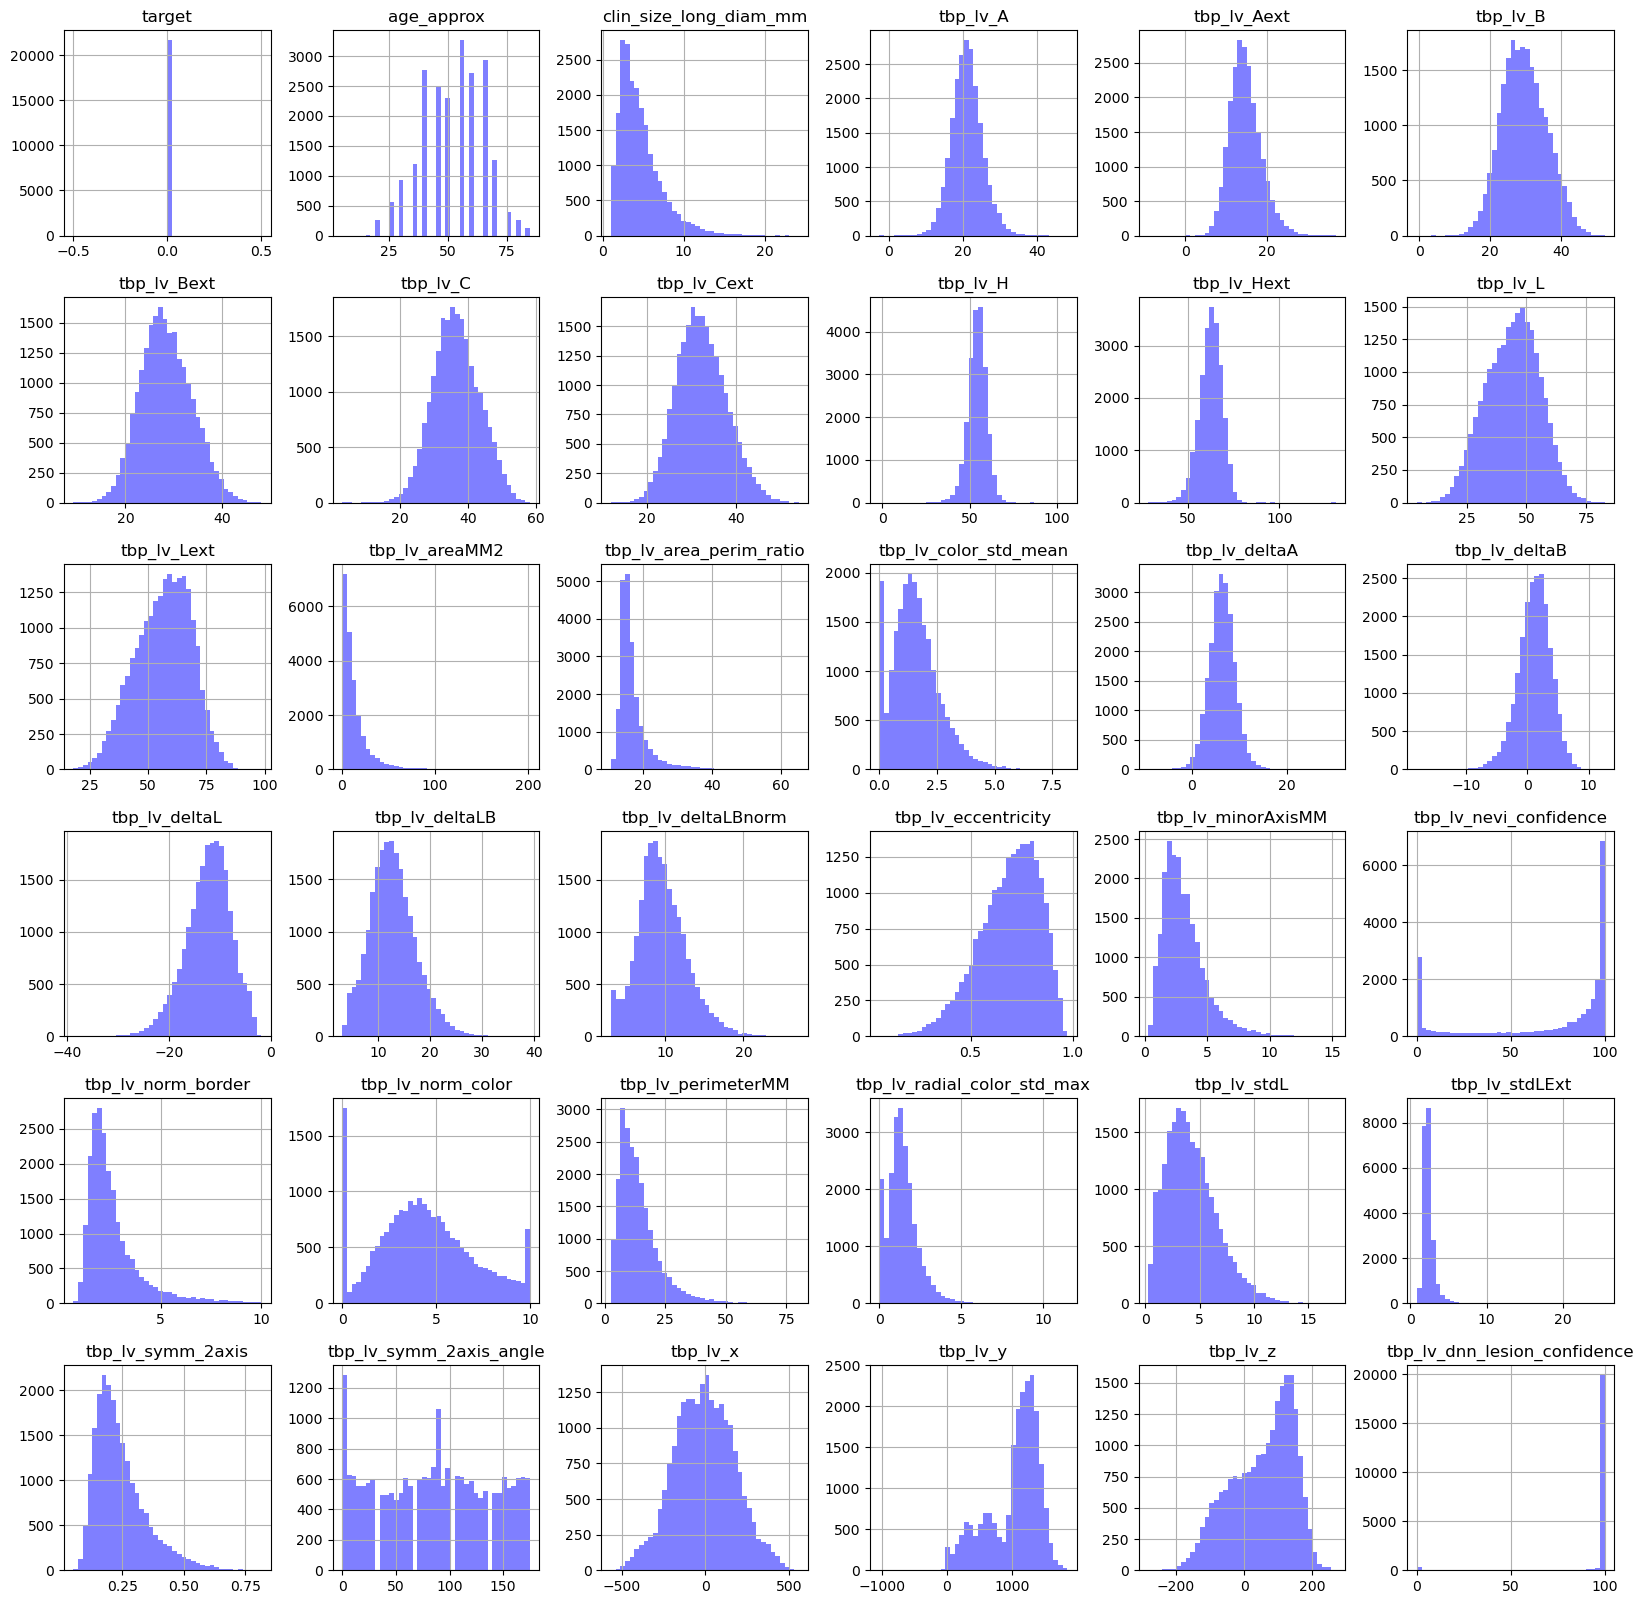

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
df_train_valid_lesion_0.hist(ax=ax, bins=40, alpha=0.5, color='blue')
# df_train_valid_lesion_1.hist(ax=ax, bins=40, alpha=0.5, color='red')
# show
plt.show()

C:\Users\26236\AppData\Local\Temp\ipykernel_15004\2228574906.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_train_valid_lesion_1.hist(ax=ax, bins=40, alpha=0.5, color='red')


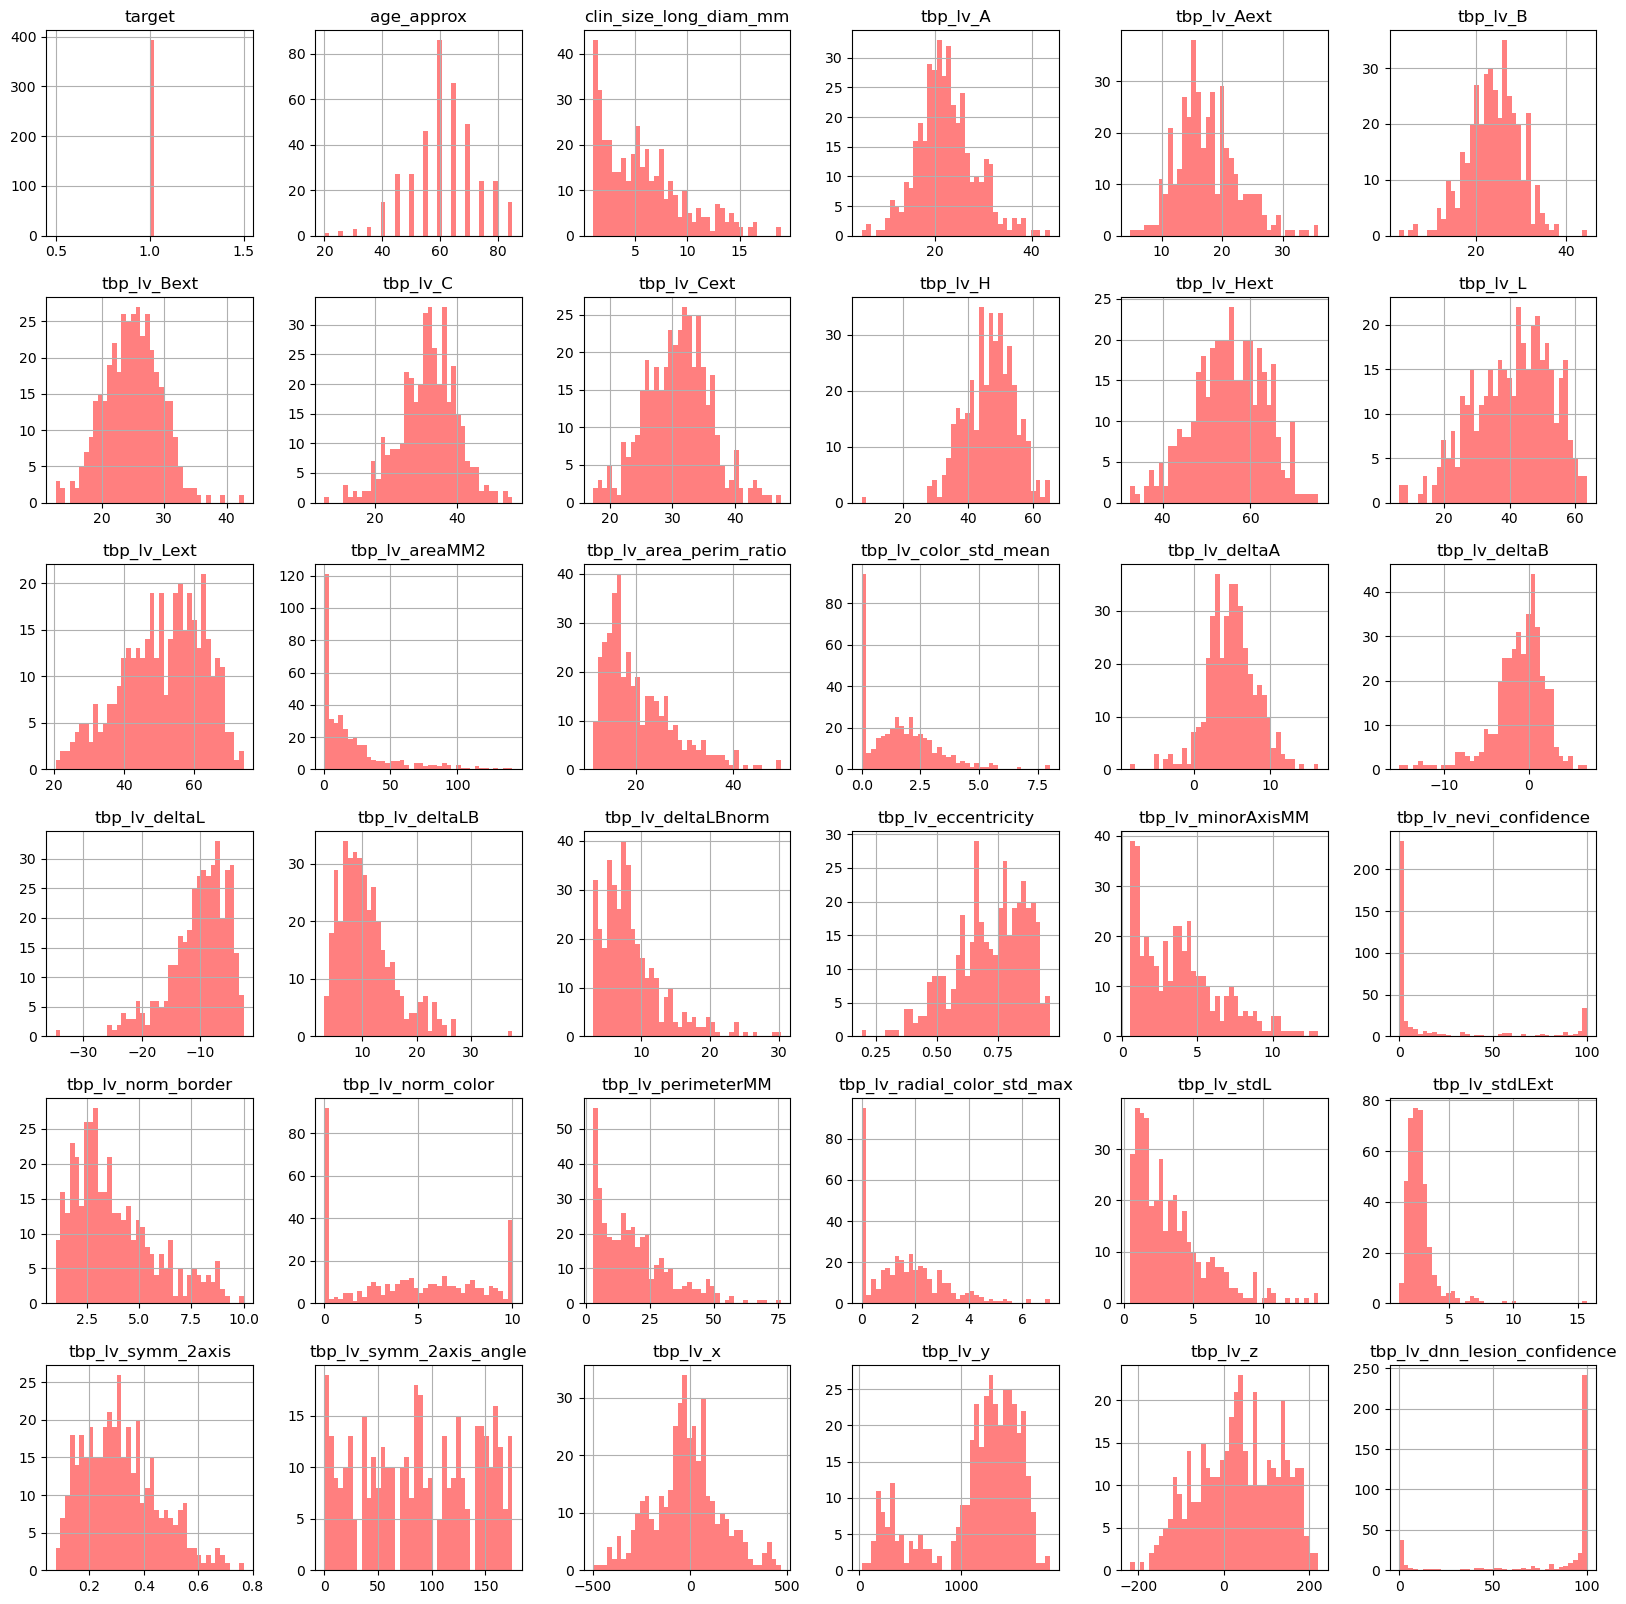

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
df_train_valid_lesion_1.hist(ax=ax, bins=40, alpha=0.5, color='red')
# show
plt.show()

In [40]:
df_train_valid_lesion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22058 entries, 1 to 401056
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   isic_id                       22058 non-null  object 
 1   target                        22058 non-null  int64  
 2   age_approx                    21894 non-null  float64
 3   sex                           21467 non-null  object 
 4   anatom_site_general           21917 non-null  object 
 5   clin_size_long_diam_mm        22058 non-null  float64
 6   tbp_lv_A                      22058 non-null  float64
 7   tbp_lv_Aext                   22058 non-null  float64
 8   tbp_lv_B                      22058 non-null  float64
 9   tbp_lv_Bext                   22058 non-null  float64
 10  tbp_lv_C                      22058 non-null  float64
 11  tbp_lv_Cext                   22058 non-null  float64
 12  tbp_lv_H                      22058 non-null  float64
 13  tbp_l

In [45]:
# see the common columns in the df_train_valid_lesion and df_test_meta
print(set(df_train_valid_lesion.columns).intersection(set(df_test_meta.columns)))
# lenght of the common columns
print(len(set(df_train_valid_lesion.columns).intersection(set(df_test_meta.columns))))
# print the column names that is unique to train dataframe
print(set(df_train_valid_lesion.columns).difference(set(df_test_meta.columns)))

{'tbp_lv_norm_color', 'tbp_lv_perimeterMM', 'tbp_lv_minorAxisMM', 'tbp_lv_color_std_mean', 'tbp_lv_L', 'tbp_lv_deltaL', 'tbp_lv_y', 'tbp_lv_symm_2axis_angle', 'tbp_lv_stdLExt', 'tbp_lv_C', 'tbp_lv_location_simple', 'tbp_lv_deltaLB', 'tbp_lv_x', 'tbp_lv_symm_2axis', 'tbp_lv_radial_color_std_max', 'tbp_lv_Lext', 'tbp_lv_area_perim_ratio', 'clin_size_long_diam_mm', 'tbp_lv_deltaLBnorm', 'anatom_site_general', 'tbp_lv_Bext', 'tbp_lv_norm_border', 'tbp_lv_nevi_confidence', 'tbp_lv_deltaB', 'tbp_lv_Aext', 'tbp_lv_Cext', 'tbp_lv_H', 'isic_id', 'tbp_lv_stdL', 'tbp_lv_z', 'tbp_lv_A', 'tbp_lv_Hext', 'tbp_lv_eccentricity', 'tbp_lv_deltaA', 'sex', 'tbp_lv_B', 'tbp_lv_areaMM2', 'age_approx'}
38
{'lesion_id', 'iddx_full', 'tbp_lv_dnn_lesion_confidence', 'target', 'iddx_1'}


In [47]:
# show the df of unique columns in the train data
df_train_valid_lesion[['lesion_id', 'iddx_full', 'tbp_lv_dnn_lesion_confidence', 'target', 'iddx_1']].head()

,lesion_id,iddx_full,tbp_lv_dnn_lesion_confidence,target,iddx_1
1,IL_6727506,Benign,3.141455,0,Benign
49,IL_3854228,Benign,99.886191,0,Benign
76,IL_9898853,Benign,99.997449,0,Benign
93,IL_2988728,Benign,100.000000,0,Benign
107,IL_6219432,Benign,99.999905,0,Benign


In [48]:
df_train_valid_lesion_unique = df_train_valid_lesion[['isic_id','target','lesion_id', 'iddx_full', 'iddx_1', 'tbp_lv_dnn_lesion_confidence']]

In [49]:
df_train_valid_lesion_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22058 entries, 1 to 401056
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   isic_id                       22058 non-null  object 
 1   target                        22058 non-null  int64  
 2   lesion_id                     22058 non-null  object 
 3   iddx_full                     22058 non-null  object 
 4   iddx_1                        22058 non-null  object 
 5   tbp_lv_dnn_lesion_confidence  22058 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [54]:
df_train_valid_lesion_unique[['target']].value_counts()

target
0         21665
1           393
Name: count, dtype: int64

In [53]:
df_train_valid_lesion_unique[['iddx_1']].value_counts()

iddx_1       
Benign           21551
Malignant          393
Indeterminate      114
Name: count, dtype: int64

The full iddx is very detailed.

In [56]:
df_train_valid_lesion_unique[['iddx_full']].value_counts()

22058

In [57]:
df_train_valid_lesion_unique[['lesion_id']].value_counts()

lesion_id 
IL_0001200    1
IL_6686097    1
IL_6690642    1
IL_6690495    1
IL_6690255    1
             ..
IL_3341065    1
IL_3340895    1
IL_3340507    1
IL_3340321    1
IL_9999138    1
Name: count, Length: 22058, dtype: int64

For the train set only data, we don't need `lesion_id` as it is unique for each image. 

Also, we don't need `iddx_full` as it is very detailed and we have a simplified version of it in `iddx_1`.

In [58]:
# therefore we drop these columns
df_train_valid_lesion_unique = df_train_valid_lesion_unique.drop(columns=['lesion_id', 'iddx_full'])
df_train_valid_lesion_unique

,isic_id,target,iddx_1,tbp_lv_dnn_lesion_confidence
1,ISIC_0015845,0,Benign,3.141455
49,ISIC_0073301,0,Benign,99.886191
76,ISIC_0073989,0,Benign,99.997449
93,ISIC_0074611,0,Benign,100.000000
107,ISIC_0075969,0,Benign,99.999905
...,...,...,...,...
400997,ISIC_9998638,0,Benign,100.000000
401019,ISIC_9999171,0,Benign,69.111250
401028,ISIC_9999315,0,Benign,99.999880
401054,ISIC_9999937,0,Benign,99.999988


In the `iddx_1`, there is benign, intermediate and malignant. We have a look if the intermediate and malignant all correspond to 1 in target value

In [59]:
# see the intermediate and malignant values
df_train_valid_lesion_unique[df_train_valid_lesion_unique['iddx_1'] != 'benign'].value_counts()

isic_id       target  iddx_1  tbp_lv_dnn_lesion_confidence
ISIC_0015845  0       Benign  3.141455                        1
ISIC_6735054  0       Benign  99.987197                       1
ISIC_6738912  0       Benign  100.000000                      1
ISIC_6737909  0       Benign  100.000000                      1
ISIC_6737470  0       Benign  99.999760                       1
                                                             ..
ISIC_3381771  0       Benign  100.000000                      1
ISIC_3381753  0       Benign  99.998415                       1
ISIC_3381637  0       Benign  99.997210                       1
ISIC_3380981  0       Benign  99.999900                       1
ISIC_9999960  0       Benign  99.999416                       1
Name: count, Length: 22058, dtype: int64

## Missing Value filling

In [79]:
df_train_valid_lesion[['sex']]

,sex
1,male
49,female
76,male
93,female
107,female
...,...
400997,male
401019,female
401028,female
401054,male


We only use the common columns

In [114]:
df_train_test = df_train_valid_lesion.copy()
df_train_test = df_train_test.drop(columns=['lesion_id', 'iddx_full', 'tbp_lv_dnn_lesion_confidence'])

In [115]:
# fill the age_approx with the mean value
df_train_test['age_approx'] = df_train_test['age_approx'].fillna(df_train_test['age_approx'].mean())

# fill the sex with the most common value (mode)
df_train_test['sex'] = df_train_test['sex'].fillna('male')

# fill the anatom_site_general with the most common value (mode)
df_train_test['anatom_site_general'] = df_train_test['anatom_site_general'].fillna(df_train_test['anatom_site_general'].mode()[0])


In [116]:
df_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22058 entries, 1 to 401056
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   isic_id                      22058 non-null  object 
 1   target                       22058 non-null  int64  
 2   age_approx                   22058 non-null  float64
 3   sex                          22058 non-null  object 
 4   anatom_site_general          22058 non-null  object 
 5   clin_size_long_diam_mm       22058 non-null  float64
 6   tbp_lv_A                     22058 non-null  float64
 7   tbp_lv_Aext                  22058 non-null  float64
 8   tbp_lv_B                     22058 non-null  float64
 9   tbp_lv_Bext                  22058 non-null  float64
 10  tbp_lv_C                     22058 non-null  float64
 11  tbp_lv_Cext                  22058 non-null  float64
 12  tbp_lv_H                     22058 non-null  float64
 13  tbp_lv_Hext         

In [117]:
# drop iddx_1
df_train_test = df_train_test.drop(columns=['iddx_1'])

## Mapping of categorical values

Using one hot encoding for the categorical values

In [118]:
# get all the categorical columns
categorical_columns = df_train_test.select_dtypes(include=['object']).columns
categorical_columns

Index(['isic_id', 'sex', 'anatom_site_general', 'tbp_lv_location_simple'], dtype='object')

In [119]:
# one hot encoding with 0 and 1
df_train_test_encoded = pd.get_dummies(df_train_test, columns=['sex', 'anatom_site_general', 'tbp_lv_location_simple'],dtype=int)

In [122]:
df_train_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22058 entries, 1 to 401056
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   isic_id                              22058 non-null  object 
 1   target                               22058 non-null  int64  
 2   age_approx                           22058 non-null  float64
 3   clin_size_long_diam_mm               22058 non-null  float64
 4   tbp_lv_A                             22058 non-null  float64
 5   tbp_lv_Aext                          22058 non-null  float64
 6   tbp_lv_B                             22058 non-null  float64
 7   tbp_lv_Bext                          22058 non-null  float64
 8   tbp_lv_C                             22058 non-null  float64
 9   tbp_lv_Cext                          22058 non-null  float64
 10  tbp_lv_H                             22058 non-null  float64
 11  tbp_lv_Hext                     

## Train Test Split

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
# get the target values
y = df_train_test_encoded['target']
X = df_train_test_encoded.drop(columns=['isic_id','target'])

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17646 entries, 54505 to 288696
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age_approx                           17646 non-null  float64
 1   clin_size_long_diam_mm               17646 non-null  float64
 2   tbp_lv_A                             17646 non-null  float64
 3   tbp_lv_Aext                          17646 non-null  float64
 4   tbp_lv_B                             17646 non-null  float64
 5   tbp_lv_Bext                          17646 non-null  float64
 6   tbp_lv_C                             17646 non-null  float64
 7   tbp_lv_Cext                          17646 non-null  float64
 8   tbp_lv_H                             17646 non-null  float64
 9   tbp_lv_Hext                          17646 non-null  float64
 10  tbp_lv_L                             17646 non-null  float64
 11  tbp_lv_Lext                 

## Normalization

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
X_train_scaled

array([[-2.04322524, -0.05124224,  0.90222772, ...,  1.36926178,
        -0.52343809, -0.078838  ],
       [-2.42438999,  0.56673649,  0.72878785, ..., -0.73032054,
        -0.52343809, -0.078838  ],
       [ 1.38725749, -0.38965916, -0.13321673, ...,  1.36926178,
        -0.52343809, -0.078838  ],
       ...,
       [ 1.38725749, -0.40437294,  0.94940574, ..., -0.73032054,
        -0.52343809, -0.078838  ],
       [ 0.24376325, -0.79060965, -0.04838039, ..., -0.73032054,
        -0.52343809, -0.078838  ],
       [ 0.24376325, -0.36023161,  0.52625321, ..., -0.73032054,
        -0.52343809, -0.078838  ]])

array([[<Axes: title={'center': 'age_approx'}>,
        <Axes: title={'center': 'clin_size_long_diam_mm'}>,
        <Axes: title={'center': 'tbp_lv_A'}>,
        <Axes: title={'center': 'tbp_lv_Aext'}>,
        <Axes: title={'center': 'tbp_lv_B'}>,
        <Axes: title={'center': 'tbp_lv_Bext'}>,
        <Axes: title={'center': 'tbp_lv_C'}>],
       [<Axes: title={'center': 'tbp_lv_Cext'}>,
        <Axes: title={'center': 'tbp_lv_H'}>,
        <Axes: title={'center': 'tbp_lv_Hext'}>,
        <Axes: title={'center': 'tbp_lv_L'}>,
        <Axes: title={'center': 'tbp_lv_Lext'}>,
        <Axes: title={'center': 'tbp_lv_areaMM2'}>,
        <Axes: title={'center': 'tbp_lv_area_perim_ratio'}>],
       [<Axes: title={'center': 'tbp_lv_color_std_mean'}>,
        <Axes: title={'center': 'tbp_lv_deltaA'}>,
        <Axes: title={'center': 'tbp_lv_deltaB'}>,
        <Axes: title={'center': 'tbp_lv_deltaL'}>,
        <Axes: title={'center': 'tbp_lv_deltaLB'}>,
        <Axes: title={'center': 'tbp_l

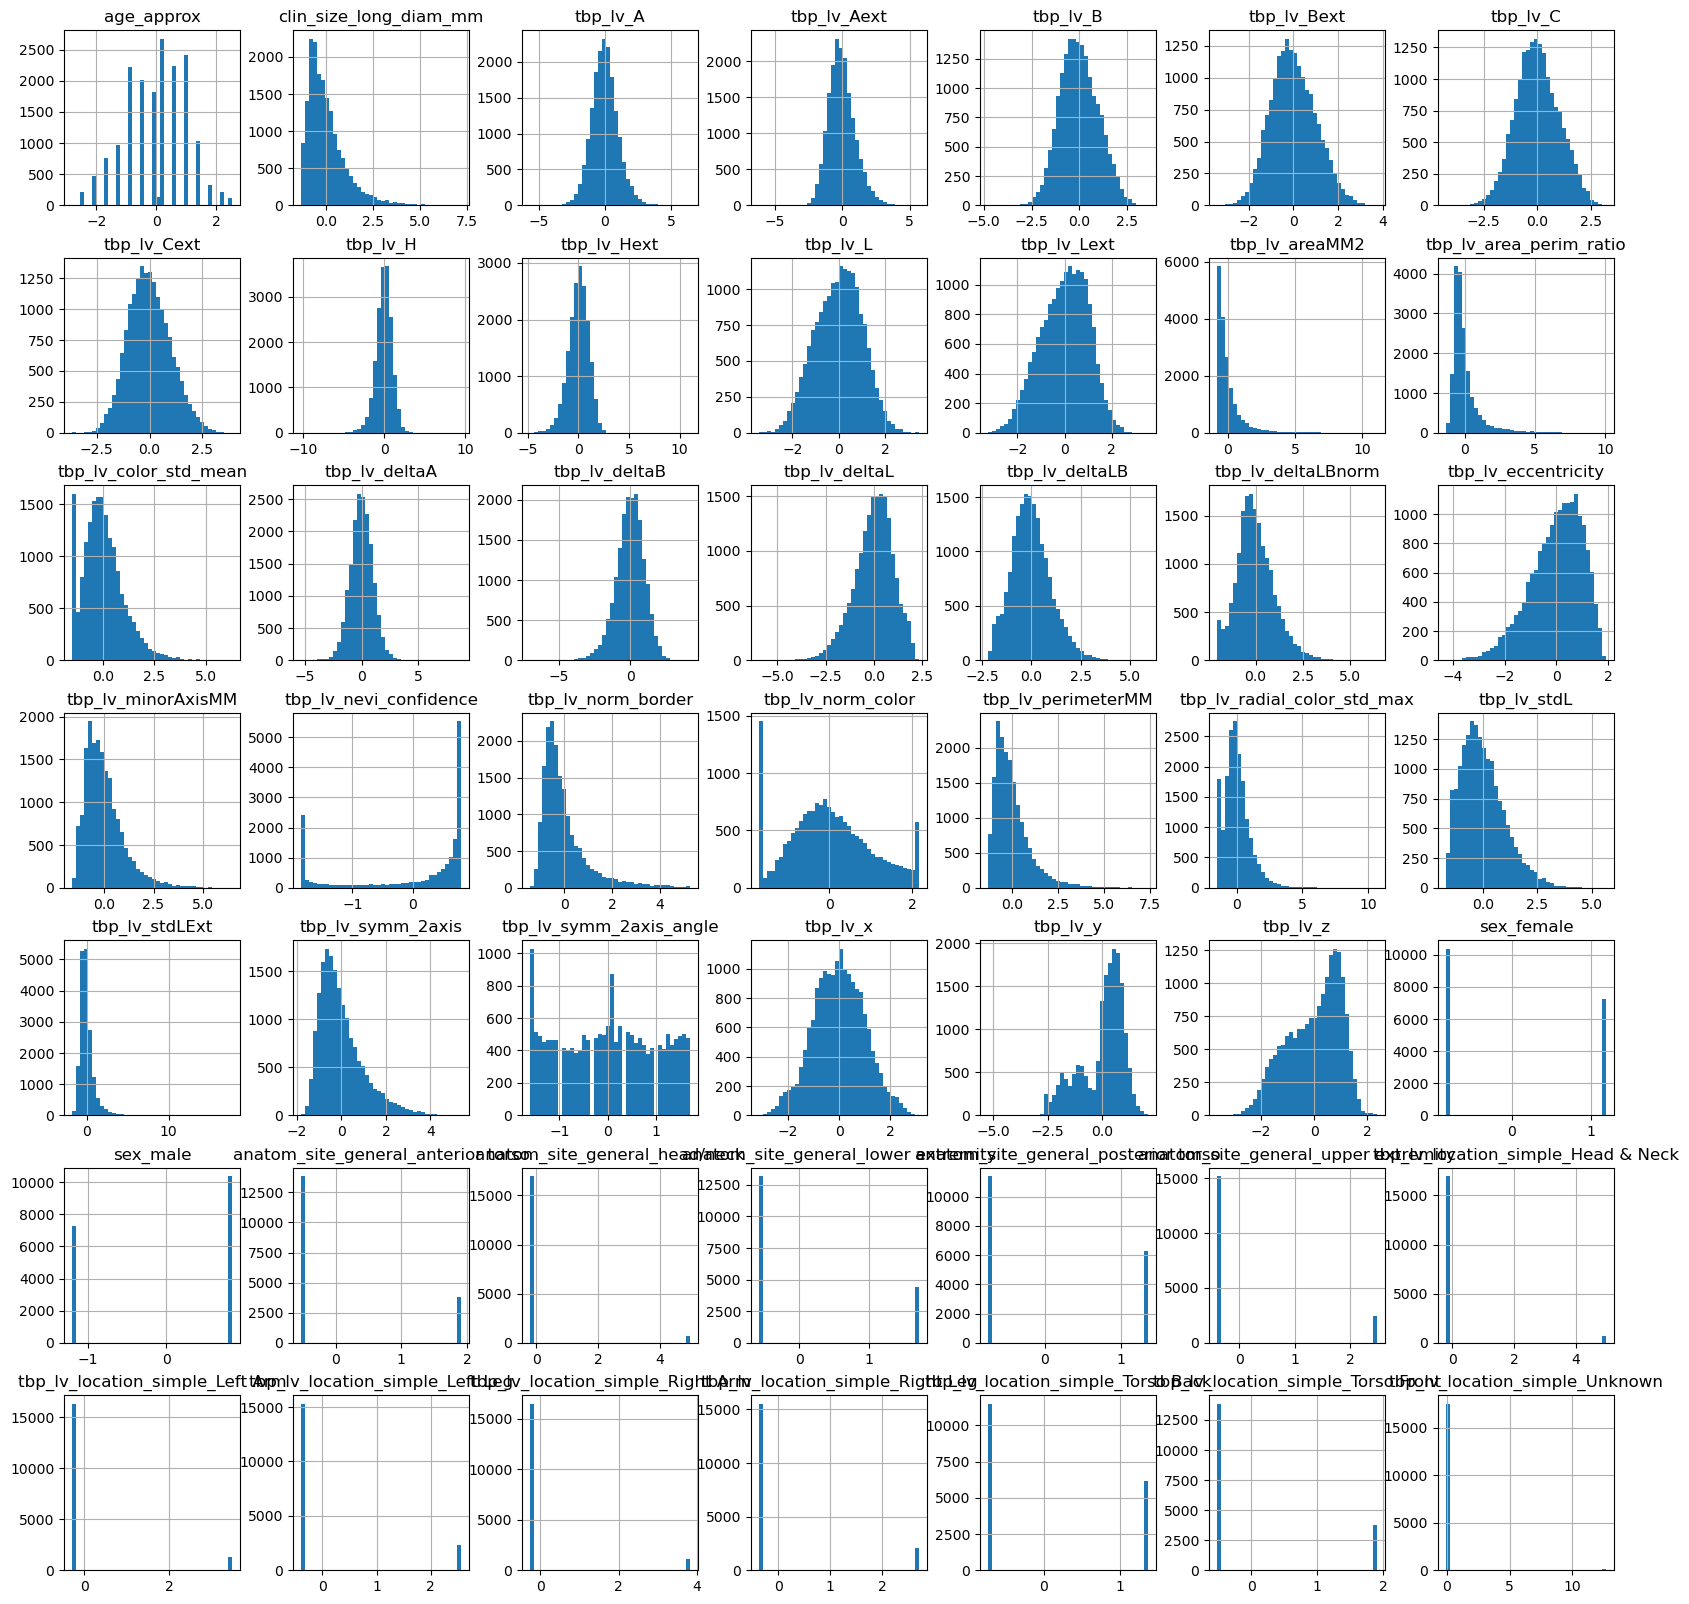

In [131]:
# draw the distribution of the scaled data
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_X_train_scaled.hist(figsize=(20, 20), bins=40)

## Data resampling

In [181]:
from imblearn.over_sampling import SMOTE

In [182]:
smote = SMOTE(random_state=42)
X_train_scaled_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


## Model Training

We combine tree models with feature selection


In [140]:
# import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

# aoc for evaluation
from sklearn.metrics import roc_auc_score

### Random Forest

In [133]:
# train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

probabilities = clf.predict_proba(X_test_scaled)[:, 1]

NameError: name 'roc_auc_score' is not defined

In [135]:
# evaluate the model
auc_score = roc_auc_score(y_test, probabilities)
auc_score

0.8356525031651936

In [137]:
# importance of the features
importances = clf.feature_importances_
importances

array([0.02616681, 0.02432024, 0.03245508, 0.02689772, 0.03004364,
       0.02690041, 0.02412843, 0.02084386, 0.06716382, 0.04640474,
       0.02263888, 0.02367773, 0.02484024, 0.02660766, 0.01956863,
       0.03245536, 0.02905042, 0.02420977, 0.02783943, 0.0270038 ,
       0.02584875, 0.02565696, 0.04177077, 0.0285204 , 0.01930923,
       0.02342729, 0.02312463, 0.02412358, 0.02640644, 0.02688219,
       0.02111574, 0.02683653, 0.03548028, 0.0285599 , 0.00386354,
       0.00356921, 0.00321742, 0.00426978, 0.00162138, 0.00257478,
       0.00248472, 0.00439462, 0.00222214, 0.00203038, 0.00234799,
       0.00123841, 0.00246517, 0.0032724 , 0.00014869])

In [138]:
# feature selection
sfm = SelectFromModel(clf, prefit=True, max_features=15)
X_train_important = sfm.transform(X_train_scaled)
X_test_important = sfm.transform(X_test_scaled)

# train the model with important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=42)
clf_important.fit(X_train_important, y_train)

probabilities_important = clf_important.predict_proba(X_test_important)[:, 1]

In [139]:
# evaluate the model
auc_score_important = roc_auc_score(y_test, probabilities_important)
auc_score_important

0.7911563901411617

### XGBoost

In [141]:
clf = XGBClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

probabilities = clf.predict_proba(X_test_scaled)[:, 1]

In [142]:
# evaluate the model
auc_score = roc_auc_score(y_test, probabilities)
auc_score

0.8496355590264221

In [143]:
# importance of the features
importances = clf.feature_importances_
importances

array([0.03802622, 0.0222319 , 0.01759296, 0.0164906 , 0.02648675,
       0.01813718, 0.01269662, 0.01465382, 0.07031946, 0.02205246,
       0.01639468, 0.01871968, 0.03740396, 0.01807414, 0.02351113,
       0.01615058, 0.02308542, 0.01908679, 0.01073615, 0.01429411,
       0.01399937, 0.02084845, 0.09966873, 0.02217583, 0.02023798,
       0.02414549, 0.0295221 , 0.02231451, 0.0214445 , 0.01696368,
       0.01621645, 0.01648928, 0.02373702, 0.01694713, 0.03256209,
       0.        , 0.03209206, 0.01604696, 0.        , 0.00559634,
       0.02303415, 0.        , 0.00534238, 0.00841755, 0.        ,
       0.01161008, 0.04444331, 0.        , 0.        ], dtype=float32)

In [183]:
clf_undersampling = XGBClassifier(n_estimators=100, random_state=42)
clf_undersampling.fit(X_train_scaled_resampled, y_train_resampled)

probabilities_undersampling = clf_undersampling.predict_proba(X_test_scaled)[:, 1]

auc_score_undersampling = roc_auc_score(y_test, probabilities_undersampling)
auc_score_undersampling

0.8255741720208726

In [144]:
# feature selection
sfm = SelectFromModel(clf, prefit=True, max_features=15)
X_train_important = sfm.transform(X_train_scaled)
X_test_important = sfm.transform(X_test_scaled)

# train the model with important features
clf_important = XGBClassifier(n_estimators=100, random_state=42)
clf_important.fit(X_train_important, y_train)

probabilities_important = clf_important.predict_proba(X_test_important)[:, 1]

In [145]:
# evaluate the model
auc_score_important = roc_auc_score(y_test, probabilities_important)
auc_score_important

0.8382290298533953

In [184]:
# feature selection with undersampling
sfm = SelectFromModel(clf_undersampling, prefit=True, max_features=15)
X_train_important = sfm.transform(X_train_scaled_resampled)
X_test_important = sfm.transform(X_test_scaled)

# train the model with important features
clf_important = XGBClassifier(n_estimators=100, random_state=42)
clf_important.fit(X_train_important, y_train_resampled)

probabilities_important = clf_important.predict_proba(X_test_important)[:, 1]

auc_score_important = roc_auc_score(y_test, probabilities_important)
auc_score_important

0.7747713369540782

## Test Data Prediction

In [146]:
df_test_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   isic_id                      3 non-null      object 
 1   patient_id                   3 non-null      object 
 2   age_approx                   3 non-null      float64
 3   sex                          3 non-null      object 
 4   anatom_site_general          3 non-null      object 
 5   clin_size_long_diam_mm       3 non-null      float64
 6   image_type                   3 non-null      object 
 7   tbp_tile_type                3 non-null      object 
 8   tbp_lv_A                     3 non-null      float64
 9   tbp_lv_Aext                  3 non-null      float64
 10  tbp_lv_B                     3 non-null      float64
 11  tbp_lv_Bext                  3 non-null      float64
 12  tbp_lv_C                     3 non-null      float64
 13  tbp_lv_Cext             

In [150]:
# we only keeps the same columns as in X
# find the common columns
common_columns = set(df_test_meta.columns).intersection(set(df_train_test.columns))
common_columns

{'age_approx',
 'anatom_site_general',
 'clin_size_long_diam_mm',
 'isic_id',
 'sex',
 'tbp_lv_A',
 'tbp_lv_Aext',
 'tbp_lv_B',
 'tbp_lv_Bext',
 'tbp_lv_C',
 'tbp_lv_Cext',
 'tbp_lv_H',
 'tbp_lv_Hext',
 'tbp_lv_L',
 'tbp_lv_Lext',
 'tbp_lv_areaMM2',
 'tbp_lv_area_perim_ratio',
 'tbp_lv_color_std_mean',
 'tbp_lv_deltaA',
 'tbp_lv_deltaB',
 'tbp_lv_deltaL',
 'tbp_lv_deltaLB',
 'tbp_lv_deltaLBnorm',
 'tbp_lv_eccentricity',
 'tbp_lv_location_simple',
 'tbp_lv_minorAxisMM',
 'tbp_lv_nevi_confidence',
 'tbp_lv_norm_border',
 'tbp_lv_norm_color',
 'tbp_lv_perimeterMM',
 'tbp_lv_radial_color_std_max',
 'tbp_lv_stdL',
 'tbp_lv_stdLExt',
 'tbp_lv_symm_2axis',
 'tbp_lv_symm_2axis_angle',
 'tbp_lv_x',
 'tbp_lv_y',
 'tbp_lv_z'}

In [153]:
# find the unique columns in the test data
unique_columns = set(df_test_meta.columns).difference(set(df_train_test.columns))
unique_columns

{'attribution',
 'copyright_license',
 'image_type',
 'patient_id',
 'tbp_lv_location',
 'tbp_tile_type'}

In [154]:
df_test_meta_dropped = df_test_meta.drop(columns = list(unique_columns))
df_test_meta_dropped

,isic_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,...,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z
0,ISIC_0015657,45.0,male,posterior torso,2.70,22.80433,20.007270,28.38412,27.043640,36.410100,...,1.143374,9.387248,0.304827,1.281532,31.114600,0.479339,20,-155.06510,1511.222000,113.980100
1,ISIC_0015729,35.0,female,lower extremity,2.52,16.64867,9.657964,31.31752,27.524318,35.467806,...,0.000000,6.340311,0.000000,1.271940,68.141071,0.426230,25,-112.36924,629.535889,-15.019287
2,ISIC_0015740,65.0,male,posterior torso,3.16,24.25384,19.937380,30.46368,28.384240,38.939500,...,0.721739,8.130868,0.230742,1.080308,41.358640,0.366071,110,-84.29282,1303.978000,-28.576050


In [157]:
pd.DataFrame(X.columns)

,0
0,age_approx
1,clin_size_long_diam_mm
2,tbp_lv_A
3,tbp_lv_Aext
4,tbp_lv_B
5,tbp_lv_Bext
6,tbp_lv_C
7,tbp_lv_Cext
8,tbp_lv_H
9,tbp_lv_Hext


In [161]:
X.head()

,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,...,anatom_site_general_posterior torso,anatom_site_general_upper extremity,tbp_lv_location_simple_Head & Neck,tbp_lv_location_simple_Left Arm,tbp_lv_location_simple_Left Leg,tbp_lv_location_simple_Right Arm,tbp_lv_location_simple_Right Leg,tbp_lv_location_simple_Torso Back,tbp_lv_location_simple_Torso Front,tbp_lv_location_simple_Unknown
1,60.0,1.10,31.712570,25.364740,26.331000,24.549290,41.219030,35.299260,39.702910,44.064040,...,0,0,1,0,0,0,0,0,0,0
49,40.0,9.59,24.237019,14.291773,28.042227,26.965422,37.064802,30.518663,49.163002,62.076246,...,1,0,0,0,0,0,0,1,0,0
76,50.0,6.39,19.600317,16.808140,29.830666,31.199751,35.693711,35.439216,56.692980,61.687465,...,0,1,0,1,0,0,0,0,0,0
93,40.0,3.31,18.007100,10.746140,24.833930,22.160240,30.675390,24.628360,54.054120,64.129910,...,0,0,0,0,0,0,1,0,0,0
107,40.0,9.05,21.315824,9.534200,30.914309,28.973342,37.550751,30.501730,55.413224,71.785279,...,1,0,0,0,0,0,0,1,0,0


In [155]:
df_test_meta_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   isic_id                      3 non-null      object 
 1   age_approx                   3 non-null      float64
 2   sex                          3 non-null      object 
 3   anatom_site_general          3 non-null      object 
 4   clin_size_long_diam_mm       3 non-null      float64
 5   tbp_lv_A                     3 non-null      float64
 6   tbp_lv_Aext                  3 non-null      float64
 7   tbp_lv_B                     3 non-null      float64
 8   tbp_lv_Bext                  3 non-null      float64
 9   tbp_lv_C                     3 non-null      float64
 10  tbp_lv_Cext                  3 non-null      float64
 11  tbp_lv_H                     3 non-null      float64
 12  tbp_lv_Hext                  3 non-null      float64
 13  tbp_lv_L                

In [158]:
# create an empty dataframe with the same columns as X
df_test_meta_dropped_encoded = pd.DataFrame(columns=X.columns)
df_test_meta_dropped_encoded


,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,...,anatom_site_general_posterior torso,anatom_site_general_upper extremity,tbp_lv_location_simple_Head & Neck,tbp_lv_location_simple_Left Arm,tbp_lv_location_simple_Left Leg,tbp_lv_location_simple_Right Arm,tbp_lv_location_simple_Right Leg,tbp_lv_location_simple_Torso Back,tbp_lv_location_simple_Torso Front,tbp_lv_location_simple_Unknown


In [160]:
# find the common columns of df_test_meta_dropped_encoded and df_test_meta_dropped
common_columns = set(df_test_meta_dropped_encoded.columns).intersection(set(df_test_meta_dropped.columns))

# fill the common columns of df_test_meta_dropped_encoded with the values of df_test_meta_dropped
df_test_meta_dropped_encoded[list(common_columns)] = df_test_meta_dropped[list(common_columns)]
df_test_meta_dropped_encoded

,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,...,anatom_site_general_posterior torso,anatom_site_general_upper extremity,tbp_lv_location_simple_Head & Neck,tbp_lv_location_simple_Left Arm,tbp_lv_location_simple_Left Leg,tbp_lv_location_simple_Right Arm,tbp_lv_location_simple_Right Leg,tbp_lv_location_simple_Torso Back,tbp_lv_location_simple_Torso Front,tbp_lv_location_simple_Unknown
0,45.0,2.70,22.80433,20.007270,28.38412,27.043640,36.410100,33.640000,51.220960,53.505430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35.0,2.52,16.64867,9.657964,31.31752,27.524318,35.467806,29.169579,62.004494,70.664619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65.0,3.16,24.25384,19.937380,30.46368,28.384240,38.939500,34.686660,51.474730,54.915410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
df_test_meta_dropped_encoded.columns

Index(['age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
       'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
       'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
       'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
       'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
       'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM',
       'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
       'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
       'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
       'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'sex_female', 'sex_male',
       'anatom_site_general_anterior torso', 'anatom_site_general_head/neck',
       'anatom_site_general_lower extremity',
       'anatom_site_general_posterior torso',
       'anatom_site_general_upper extremity',
       'tbp_lv_location_simple_Head & Neck', 'tbp_lv_location_simple

In [171]:
# fill the sex
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('sex_female')] = 0
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('sex_male')] = 1
df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('sex_female')] = 1
df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('sex_male')] = 0
df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('sex_female')] = 0
df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('sex_male')] = 1

# fill the anatom_site_general
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_anterior torso')] = 0
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_head/neck')] = 0
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_lower extremity')] = 0
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_posterior torso')] = 1
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_upper extremity')] = 0

df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_anterior torso')] = 0
df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_head/neck')] = 0
df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_lower extremity')] = 1
df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_posterior torso')] = 0
df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_upper extremity')] = 0

df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_anterior torso')] = 0
df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_head/neck')] = 0
df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_lower extremity')] = 0
df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_posterior torso')] = 1
df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('anatom_site_general_upper extremity')] = 0

# fill the tbp_lv_location_simple
# Row 0 updates
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Head & Neck')] = 0
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Left Arm')] = 0
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Left Leg')] = 0
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Right Arm')] = 0
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Right Leg')] = 0
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Torso Back')] = 1
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Torso Front')] = 0
df_test_meta_dropped_encoded.iloc[0, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Unknown')] = 0

# Row 1 updates
df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Head & Neck')] = 0
df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Left Arm')] = 0
df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Left Leg')] = 1
df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Right Arm')] = 0
df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Right Leg')] = 0
df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Torso Back')] = 0
df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Torso Front')] = 0
df_test_meta_dropped_encoded.iloc[1, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Unknown')] = 0

# Row 2 updates
df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Head & Neck')] = 0
df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Left Arm')] = 0
df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Left Leg')] = 0
df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Right Arm')] = 0
df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Right Leg')] = 0
df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Torso Back')] = 1
df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Torso Front')] = 0
df_test_meta_dropped_encoded.iloc[2, df_test_meta_dropped_encoded.columns.get_loc('tbp_lv_location_simple_Unknown')] = 0

In [173]:
df_test_meta_dropped_encoded.columns == X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [174]:
# standardize the test data
df_test_meta_dropped_encoded_scaled = scaler.transform(df_test_meta_dropped_encoded)

# predict the probabilities using all features
probabilities_submission = clf.predict_proba(df_test_meta_dropped_encoded_scaled)[:, 1]
probabilities_submission

array([6.0734386e-04, 7.2687370e-05, 2.4393699e-03], dtype=float32)

In [178]:
# read in the sample submission
df_sample_submission = pd.read_csv(data_path + 'sample_submission.csv')
df_sample_submission

,isic_id,target
0,ISIC_0015657,0.3
1,ISIC_0015729,0.3
2,ISIC_0015740,0.3


In [179]:
# replace the target with the predicted probabilities
df_sample_submission['target'] = probabilities_submission
df_sample_submission

,isic_id,target
0,ISIC_0015657,0.000607
1,ISIC_0015729,0.000073
2,ISIC_0015740,0.002439


In [180]:
# export the submission
df_sample_submission.to_csv('submission_baselineML_03072024.csv', index=False)